# Car Price Prediction Using Supervised Learning

## Aviral Agarwal
## 9919103144
## Batch F5

### 1. Exploring Data

Importing numpy (Numerical Python Library) for basic mathematical operations
Importing pandas for data exploration cleaning and visualizing
Importing pyplot module from matplotlib library for graphical representation of data
Importing seaborn library which is based on matplotlib which helps us make more intricate graphs
Importong linear_regression from sklearn and in turn importing LinearRegression which helps us model our data and use Linear Regression algorithm

Then we read the dataset stored in CarPriceDataset.csv and storing it in variable cars

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# reading the dataset
cars = pd.read_csv("CarPriceDataset.csv")
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Data Dictionary
The data dictionary contains the meaning of various attributes; some of them are described and displayed below


In [16]:
# symboling: -2 (least risky) to +3 most risky
cars['symboling'].astype('category').value_counts()


0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

sns i.e. seaborn library helps us plot price versus count distribution graph using displot fucntion

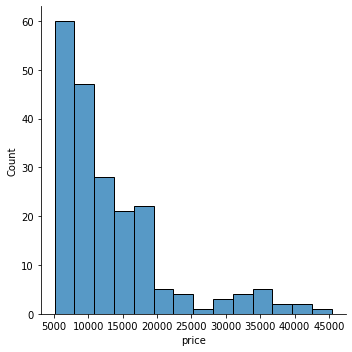

In [17]:
# target variable: price of car
sns.displot(cars['price'])
plt.show()

### Making Pairwise Plot

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*.

We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

We select the columns which have data types as float and integer and drop the others. This way we have only th properties which can help us establish a numeric relationship.

Next we drop the symboling column as it is a categorical property and have only 6 values and the car_ID column.

In [18]:
# all numeric (float and int) variables in the dataset
cars_numeric = cars.select_dtypes(include=['float64', 'int'])
cars_numeric.head()
cars_numeric = cars_numeric.drop(['symboling', 'car_ID'], axis=1)
cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


### Heatmap for variable correlation

We can see the correlation between different variables and also show a heatmap of the correlation so as to see them clearly and choose which variables are necessary for our regression.

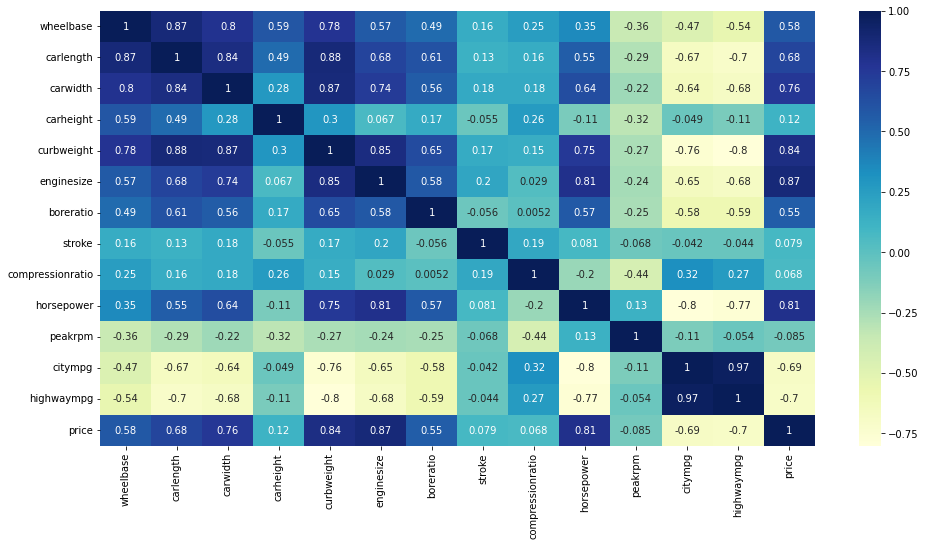

In [19]:
# correlation matrix
cor = cars_numeric.corr()
cor

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

From the heatmap we can observe that

Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower i.e., the variables which define the weight,size and power of the car.

## 2. Data Cleaning

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except ```symboling```, which should rather be a categorical variable.

In [20]:
# converting symboling to categorical
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Now we extract the car company name from the car names. The car company name in each value of car name is the value before space.
We create a new column in the cars object to store the car company names.

In [21]:
import re

# regex: any alphanumeric sequence before a space, may contain a hyphen
p = re.compile(r'\w+-?\w+')
carnames = cars['CarName'].apply(lambda x: re.findall(p, x)[0])
print(carnames)

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object


In [22]:
cars['car_company'] = cars['CarName'].apply(lambda x: re.findall(p, x)[0])
# look at all values 
cars['car_company'].astype('category').value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: car_company, dtype: int64

Correcting Data Quality Issue

Many of the car company names are misspelled and are therefore repeated unecessarily.

In [23]:
# replacing misspelled car_company names

# volkswagen
cars.loc[(cars['car_company'] == "vw") | 
         (cars['car_company'] == "vokswagen")
         , 'car_company'] = 'volkswagen'

# porsche
cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'

# toyota
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = 'toyota'

# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'

cars['car_company'].astype('category').value_counts()

# drop carname variable
cars = cars.drop('CarName', axis=1)

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.
First we split the values in X and Y i.e., the input and output of our model.

In [24]:
# split into X and y
X = cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'car_company']]

y = cars['price']

Next we create dummy variables for categorical variables.

In [25]:
# creating dummy variables for categorical variables

# subset all categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [26]:
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# drop categorical variables 
X = X.drop(list(cars_categorical.columns), axis=1)
# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)

Next we scale the data so that the values are in a given range and the model can assess the relation between them more efficiently.

In [28]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after scaling
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',


Now we split the data between test data and train data

In [29]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 3. Building Linear Regression Model

In [30]:

lm = LinearRegression()

lm.fit(X_train, y_train)

print(lm.coef_)
print(lm.intercept_)

[ 1.28804792e+03 -1.04955210e+03  1.68834559e+03 -1.25904071e+03
  2.42027090e+03  1.16263350e+04 -4.85038954e+03 -1.13424087e+03
 -2.56951960e+03 -9.73644812e+02  1.35681433e+03 -2.61818510e+02
  7.44239551e+02  7.36334360e+02  8.01800617e+02  7.02360200e+02
  6.47750839e+02  3.50558608e+02 -1.20683560e+03  1.01248452e+03
 -2.33385958e+02 -7.69280387e+02 -1.83640992e+03 -1.66162816e+03
 -9.12566337e+02 -9.28943930e+01  4.42816604e+02  1.15665864e+03
  5.50557360e+02  6.45972107e+01  1.55937229e+02  9.01690070e+02
 -2.89587453e+02  2.03544173e+03  2.20137145e+03  6.79103088e+03
  1.39274072e+03  1.78808440e+03 -1.04955642e+03  2.03544173e+03
  4.50875447e+02 -1.64299332e+02  1.20683560e+03 -1.13686838e-13
 -2.08926886e+02 -5.83874480e+01  2.27373675e-13  5.21573928e+02
  2.39504091e+03  3.76793525e+02 -1.83326364e+02 -6.98406228e+02
 -5.19749514e+02  6.03320099e+01 -4.92211850e+02  3.10813552e+02
 -1.13686838e-12 -1.05964701e+03  3.61145168e+02 -4.85552717e+02
 -6.84202629e+02  1.44392

Now we try to predict the value of y with the current model using all the variables and calculate the r2 score for the results.

In [31]:
# predict 
y_pred = lm.predict(X_test)

# metrics
from sklearn.metrics import r2_score

print(r2_score(y_true=y_test, y_pred=y_pred))

0.8382621393399072


Now we use the Recursive Feature Elimination so as to lower the number of variables and eliminate the varoiables which are not affecting our results much.

In [32]:

from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe_15 = RFE(estimator=lm, n_features_to_select=15)

# fit with 15 features
rfe_15.fit(X_train, y_train)

# Printing the boolean results
print(rfe_15.support_)           
print(rfe_15.ranking_)  

[False False  True False  True  True  True  True False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False  True  True  True
 False  True  True  True False False False False False False False False
  True False False False False False False False False False False  True
 False  True False False False False False False]
[ 4  5  1  7  1  1  1  1  9 35 13 45 22 25 27 28 26 29 11  2 37 19  6 17
 18 47 23  1 33 46 24 20 38  1  1  1 32  1  1  1 14 44 10 54 48 50 52 36
  1 39 30 15 21 49 34 42 53  3 40  1 16  1 51  8 31 43 41 12]


In [33]:
# making predictions using rfe model
y_pred = rfe_15.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))

0.8941491916479425


In [34]:
# RFE with 6 features
from sklearn.feature_selection import RFE

# RFE with 6 features
lm = LinearRegression()
rfe_6 = RFE(estimator=lm, n_features_to_select=6)

# fit with 6 features
rfe_6.fit(X_train, y_train)

# predict
y_pred = rfe_6.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))

0.8851422877312571


Since there is not much difference between the r2 score for our model with 15 and 6 variables we need to decide wether to keep more variables or not. The adjusted r2 score keeps in mind the number of variables used too. So we sill decide according to adjusted r2 score.

In [35]:
# import statsmodels
import statsmodels.api as sm  

# subset the features selected by rfe_15
col_15 = X_train.columns[rfe_15.support_]

# subsetting training data for 15 selected columns
X_train_rfe_15 = X_train[col_15]

# add a constant to the model
X_train_rfe_15 = sm.add_constant(X_train_rfe_15)
X_train_rfe_15.head()

lm_15 = sm.OLS(y_train, X_train_rfe_15).fit()   
print(lm_15.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           1.03e-70
Time:                        10:52:45   Log-Likelihood:                -1283.6
No. Observations:                 143   AIC:                             2597.
Df Residuals:                     128   BIC:                             2642.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.347e+

In [36]:
# making predictions using rfe_15 sm model
X_test_rfe_15 = X_test[col_15]

# # Adding a constant variable 
X_test_rfe_15 = sm.add_constant(X_test_rfe_15, has_constant='add')

# # Making predictions
y_pred = lm_15.predict(X_test_rfe_15)

# r-squared
r2_score(y_test, y_pred)

0.8941491916479424

To Choose the optimum number of features we will plot a graph between the number of features and the adjusted r2 for each of them.

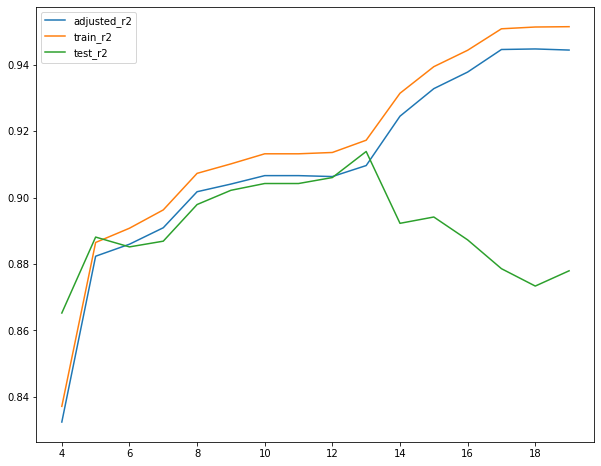

In [37]:
n_features_list = list(range(4, 20))
adjusted_r2 = []
r2 = []
test_r2 = []

for n_features in range(4, 20):

    # RFE with n features
    lm = LinearRegression()

    # specify number of features
    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # subset the features selected by rfe_6
    col_n = X_train.columns[rfe_n.support_]

    # subsetting training data for 6 selected columns
    X_train_rfe_n = X_train[col_n]

    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    # fitting the model with 6 variables
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    adjusted_r2.append(lm_n.rsquared_adj)
    r2.append(lm_n.rsquared)
    
    
    # making predictions using rfe_15 sm model
    X_test_rfe_n = X_test[col_n]


    # # Adding a constant variable 
    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')



    # # Making predictions
    y_pred = lm_n.predict(X_test_rfe_n)
    
    test_r2.append(r2_score(y_test, y_pred))
    
# plotting adjusted_r2 against n_features
plt.figure(figsize=(10, 8))
plt.plot(n_features_list, adjusted_r2, label="adjusted_r2")
plt.plot(n_features_list, r2, label="train_r2")
plt.plot(n_features_list, test_r2, label="test_r2")
plt.legend(loc='upper left')
plt.show()

As we can see from the graph the value of adjusted r2 doesnot change much from 6 to 12 we can take 6 features for our model.

In [39]:
# RFE with n features
lm = LinearRegression()

n_features = 6

# specify number of features
rfe_n = RFE(estimator=lm, n_features_to_select=n_features)

# fit with n features
rfe_n.fit(X_train, y_train)

# subset the features selected by rfe_6
col_n = X_train.columns[rfe_n.support_]

# subsetting training data for 6 selected columns
X_train_rfe_n = X_train[col_n]

# add a constant to the model
X_train_rfe_n = sm.add_constant(X_train_rfe_n)


# fitting the model with 6 variables
lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
adjusted_r2.append(lm_n.rsquared_adj)
r2.append(lm_n.rsquared)


# making predictions using rfe_6 sm model
X_test_rfe_n = X_test[col_n]


# # Adding a constant variable 
X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')



# # Making predictions
y_pred = lm_n.predict(X_test_rfe_n)

test_r2.append(r2_score(y_test, y_pred))

# summary
lm_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     184.8
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           7.79e-63
Time:                        10:53:23   Log-Likelihood:                -1325.8
No. Observations:                 143   AIC:                             2666.
Df Residuals:                     136   BIC:                             2686.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.339e+04    221.912     60.350      0.000     1.3e+04    1.38e+04
carwidth             2022.5954    467.095      4.330      0.000    1098.886    2946.305
curbweight           2280.5711    582.682      3.914      0.000    1128.283    3432.860
enginesize           2455.4132    470.374      5.220      0.000    1525.219    3385.607
enginelocation_rear  1526.3407    406.639      3.754      0.000     722.187    2330.495
car_company_bmw      1755.2549    222.194      7.900      0.000    1315.853    2194.657
car_company_porsche   707.8462    306.321      2.311      0.022     102.077    1313.615
==============================================================================
Omnibus:                        8.829   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.273
Skew:                           0.478   Prob(JB):                      0.00969
Kurtosis:                       3.801   Cond. No.                         5.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# results 
r2_score(y_test, y_pred)

0.8851422877312569